In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\bhavya vegad\Downloads\car_prediction_data (1).csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
df.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.drop(['Car_Name'],axis=1)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
print(df.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [11]:
print(df.Seller_Type.value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [12]:
print(df.Transmission.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [13]:
df.replace({"Fuel_Type":{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)

df.replace({"Seller_Type":{'Dealer':0, 'Individual':1}},inplace=True)

df.replace({"Transmission":{'Manual':0, 'Automatic':1}},inplace=True)

In [14]:
df.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [15]:
x = df.drop(['Car_Name', 'Selling_Price'],axis=1)
y = df['Selling_Price']

In [16]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [17]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 2)

In [19]:
x_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,4.430,28282,0,0,0,0
249,2016,7.600,17000,0,0,0,0
277,2015,13.600,21780,0,0,0,0
194,2008,0.787,50000,0,1,0,0
244,2013,9.400,49000,1,0,0,0
...,...,...,...,...,...,...,...
75,2015,6.800,36000,0,0,0,0
22,2011,8.010,50000,0,0,1,0
72,2013,18.610,56001,0,0,0,0
15,2016,10.790,43000,1,0,0,0


In [20]:
x_test

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
99,2010,20.450,50024,1,0,0,0
161,2014,0.826,23000,0,1,0,0
89,2014,6.760,40000,0,0,0,0
30,2012,5.980,51439,1,0,0,0
232,2015,14.790,12900,0,0,1,0
290,2014,6.400,19000,0,0,0,0
35,2011,7.740,49998,2,0,0,0
7,2015,8.610,33429,1,0,0,0
183,2013,0.470,21000,0,1,0,0
13,2015,7.710,26000,0,0,0,0


In [21]:
y_train

204    2.75
249    5.25
277    9.70
194    0.20
244    5.95
       ... 
75     3.95
22     4.40
72     7.45
15     7.75
168    0.42
Name: Selling_Price, Length: 270, dtype: float64

In [22]:
lin_reg_model = LinearRegression()



In [23]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [24]:
trainning_data_prediction = lin_reg_model.predict(x_train)

In [25]:
error_score = metrics.r2_score(y_train, trainning_data_prediction)
print("R squred error:", error_score)

R squred error: 0.8799451660493698


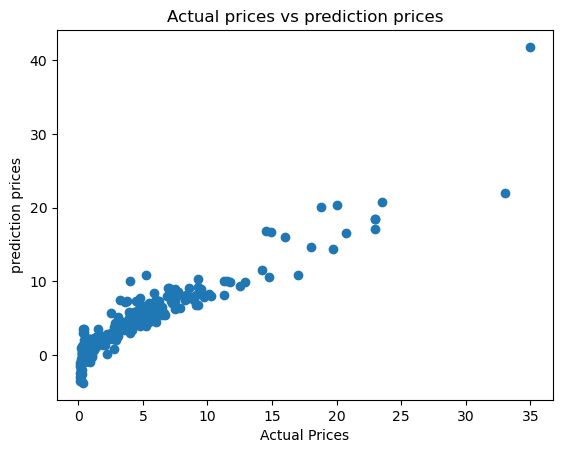

In [26]:
plt.scatter(y_train, trainning_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("prediction prices")
plt.title("Actual prices vs prediction prices")
plt.show()

In [27]:
test_data_prediction = lin_reg_model.predict(x_test)

In [28]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error:", error_score)

R squared error: 0.8365766715026928


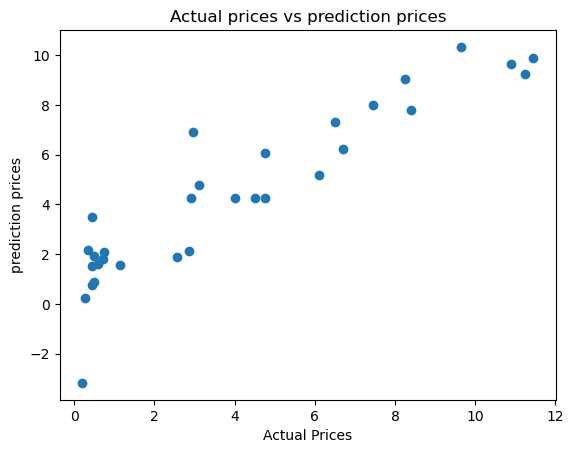

In [29]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("prediction prices")
plt.title("Actual prices vs prediction prices")
plt.show()

In [30]:
import pickle

saved_model = pickle.dumps(lin_reg_model)
carpredict_from_pickle = pickle.loads(saved_model)
carpredict_from_pickle.predict(x_test)

array([10.32892855,  0.77165673,  4.26482324,  4.78985002,  9.88701568,
        4.24823193,  6.92536953,  7.29321065,  0.21950514,  5.18527582,
        6.23823964,  6.07761019,  2.1716932 ,  7.77611973,  1.89987958,
        1.79635895,  2.10001123,  1.91953211,  9.24977006,  4.25291486,
        1.569912  ,  9.04949049,  1.52561157,  9.65418587,  0.89631315,
        7.99187626,  1.59929505, -3.17680912,  4.24653988,  2.1257015 ,
        3.49654935])

In [31]:
pickle.dump(lin_reg_model,open('carmodel.pkl', 'wb'))

In [32]:
model = pickle.load(open("carmodel.pkl", "rb"))

In [33]:
print(model.predict([[2014,5.59,27000,0,0,0,0]]))

[3.83901354]


C:\Users\bhavya vegad\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
print(model.predict([[2017,12.50,9000,1,0,0,0]]))

[9.98314981]


C:\Users\bhavya vegad\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,0,0
297,brio,2015,4.00,5.9,60000,0,0,0,0
298,city,2009,3.35,11.0,87934,0,0,0,0
299,city,2017,11.50,12.5,9000,1,0,0,0
300,brio,2016,5.30,5.9,5464,0,0,0,0


In [36]:
print(model.predict([[2016,5.9,5464,0,0,0,0]]))

[4.93883063]


C:\Users\bhavya vegad\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
